## Exercise 2 (Gaussian Proccesses II)
* Implement GP model for performing regression with noise and means 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm, pinv

In [75]:
# part a
class GP_model():
    def __init__(self, sigY, sigF, l):
        self.l, self.sigY, self.sigF = l, sigY, sigF

    def fit(self, datX, datY):
        self.datX, self.datY = datX, datY
        xx_s = np.zeros((len(datX), len(datX)))
        for i in range(len(datX)):
            xx_s[:, i] = (datX - datX[i])**2
        self.K_y = (self.sigF**2) * np.exp((-1 / (2 * self.l**2)) * xx_s) + sigY**2 * np.identity(len(datX), dtype = float) 
        self.alpha = pinv(self.K_y) @ datY

    def predict(self, xTest):
        xx_s = np.zeros((len(self.datX), len(xTest)))
        for i in range(len(xTest)):
            xx_s[:, i] = (self.datX - xTest[i])**2
        self.K_s = (self.sigF**2) * np.exp((-1 / (2 * self.l**2)) * xx_s)
        xx_s = np.zeros((len(xTest), len(X_s)))
        for i in range(len(X_s)):
            xx_s[:, i] = (xTest - X_s[i])**2
        vPred = ((self.sigF**2) * np.exp((-1 / (2 * self.l**2)) * xx_s)) + sigY**2 * np.identity(X_s.shape[0]) - self.K_s.T @ (pinv(self.K_y) @ self.K_s)
        return self.K_s.T @ self.alpha, vPred

    def evaluate(datX, datY):
        yPred, tmp = self.predict(datX)
        return (datY - yPred)**2

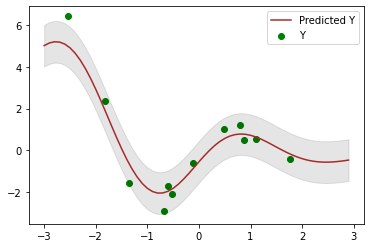

In [77]:
# part b
sigY, sigF, l = 0.5, 1, 1
data = np.loadtxt('tutorial2.dat', unpack = True)
datX, datY = data[0], data[1]

GPModel = GP_model(sigY, sigF, l)
GPModel.fit(datX, datY)
xTest = np.arange(-3, 3, 0.1)
yPred, vPred = GPModel.predict(xTest)
plt.scatter(datX, datY, color = 'green', label = 'Y')
plt.plot(xTest, yPred, label = 'Predicted Y', color = 'brown')
plt.fill_between(xTest, yPred + 1, yPred - 1, alpha = 0.1, color = 'black')
plt.legend()
plt.show()